Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Loading the dataset
#last 5 years data of APPLE Inc
train_dst = pd.read_csv("StockPred\AAPL.csv")

In [3]:
train_dst.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-09,32.912498,33.112499,32.779999,33.105000,31.115643,113399600
1,2017-02-10,33.115002,33.235001,33.012501,33.029999,31.045147,80262000
2,2017-02-13,33.270000,33.455002,33.187500,33.322498,31.320076,92141600
3,2017-02-14,33.367500,33.772499,33.312500,33.755001,31.726597,132904800
4,2017-02-15,33.880001,34.067501,33.654999,33.877499,31.841732,142492400


In [4]:
train_dst.shape

(1259, 7)

In [5]:
train_dst.size

8813

In [6]:
train_dst.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,77.567363,78.424170,76.747369,77.624299,76.040193,1.204514e+08
std,42.363162,42.884776,41.841444,42.382807,42.647120,5.546392e+07
min,32.912498,33.112499,32.779999,33.029999,31.045147,4.100000e+07
25%,43.418749,43.750000,43.100001,43.528750,41.472645,8.352340e+07
50%,55.037498,55.639999,54.322498,55.105000,53.407444,1.055755e+08
75%,119.760002,121.084999,118.150002,119.695000,118.363705,1.408685e+08
max,182.630005,182.940002,179.119995,182.009995,180.959732,4.265100e+08


In [7]:
train_dst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [8]:
train_dst.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
train_set = train_dst.iloc[:,1:2].values
print(train_set)
print(train_set.shape)

[[ 32.912498]
 [ 33.115002]
 [ 33.27    ]
 ...
 [171.679993]
 [172.860001]
 [171.729996]]
(1259, 1)


In [10]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

t_scaler = MinMaxScaler(feature_range = (0,1)) 
scaler_train_set = t_scaler.fit_transform(train_set)
scaler_train_set


array([[0.        ],
       [0.00135257],
       [0.00238784],
       ...,
       [0.92686218],
       [0.93474374],
       [0.92719616]])

In [11]:
#X and y train
X_train = []
Y_train = []
for i in range(60,1259):
    X_train.append(scaler_train_set[i-60:i, 0])
    Y_train.append(scaler_train_set[i, 0])
X_train = np.array(X_train)
Y_train = np.array(Y_train)

print(X_train.shape)
print(Y_train.shape)

(1199, 60)
(1199,)


In [12]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(1199, 60, 1)


In [13]:
#LSTM model

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [14]:
reg = Sequential()
reg.add(LSTM(units=50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50, return_sequences = True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50, return_sequences = True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50))
reg.add(Dropout(0.2))

reg.add(Dense(units=1))

In [15]:
reg.compile(optimizer = 'adam', loss = 'mean_squared_error')
reg.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 16s 163ms/step - loss: 0.0212
Epoch 2/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0038
Epoch 3/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0032
Epoch 4/100
38/38 [==============================] - 6s 169ms/step - loss: 0.0030
Epoch 5/100
38/38 [==============================] - 4s 105ms/step - loss: 0.0029
Epoch 6/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0034
Epoch 7/100
38/38 [==============================] - 6s 155ms/step - loss: 0.0034
Epoch 8/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0027
Epoch 9/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0028
Epoch 10/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0024
Epoch 11/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0026
Epoch 12/100
38/38 [==============================] - 6s 164ms/step - loss: 0.0022
Epoch 13/100


In [16]:
test_dst = pd.read_csv("StockPred\AAPL_latest.csv")
actual_stock = test_dst.iloc[:,1:2].values
print(test_dst.shape)
#print(actual_stock)

total_dst = pd.concat((train_dst['Open'], test_dst['Open']), axis = 0)
inputs = total_dst[len(total_dst)-len(test_dst)-60:].values

inputs = inputs.reshape(-1,1)
inputs = t_scaler.transform(inputs)

X_test = []
for i in range(60,300):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

print(X_test.shape)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1)) 

(252, 7)
(240, 60)


In [17]:
predict_stock = reg.predict(X_test)
predict_stock = t_scaler.inverse_transform(predict_stock)

8/8 [==============================] - 2s 39ms/step


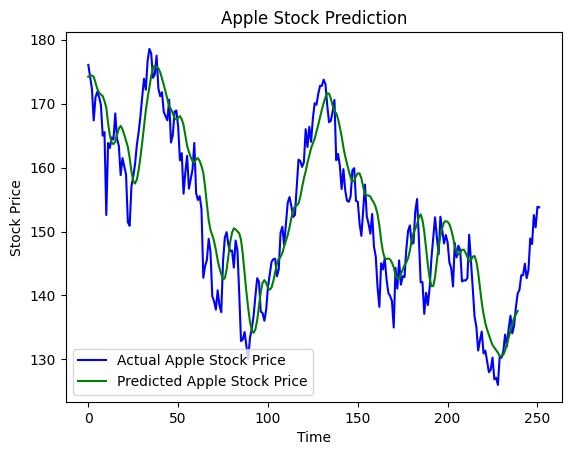

In [18]:
plt.plot(actual_stock, color = 'blue', label = 'Actual Apple Stock Price')
plt.plot(predict_stock, color = 'green', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()